<a href="https://colab.research.google.com/github/yash121299/PyTorch_Learning/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Exploring a PyTorch workflow end-to-end.

Resources:
* Ground Truth notebook (Github Link) - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book Version (Online Notebook) - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a Question (Github Discussions page) - https://github.com/mrdbourke/pytorch-deep-learning/discussions

What we are covering:

1. Data (preparing and loading)
2. Build model
3. Fitting the model to data (training)
4. Making predictions and evaluating a model (inference)
5. Saving and loading a model
6. Putting it all together

In [2]:
# Making this into a dictonary so we can reference to it later on in the code
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "Making predictions and evaluating the model (inference)",
    5: "Saving and loading the model",
    6: "Putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'Making predictions and evaluating the model (inference)',
 5: 'Saving and loading the model',
 6: 'Putting it all together'}

In [3]:
#Importing Libraries
import torch
from torch import nn # nn contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

print(torch.__version__)

2.6.0+cu124


`nn` Module Documentation - https://docs.pytorch.org/docs/stable/nn.html

`nn` contains the building blocks (mostly layers) for neural networks. Our job is to organize those layers to create any type of neural networks. A neural network is basically a computational graph.

## 1.Data (Preparing and Loading)

Data can be almost anything... in machine learning.

* Excel Spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning (Deep Learning) is a game of 2 parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation


To showcase this, let's create some *known* data using the linear regression formula

     The general equation for a linear regression is y = mx + b, where:

      y: is the dependent variable (the one you're trying to predict)

      x: is the independent variable (the one you're using to make predictions)

      m: is the slope of the line (also called gradient), representing the change in y for every unit change in x

      b: is the y-intercept, representing the value of y when x is zero.

We'll use the linear regression formula to make a straight line with *known* **parameters**.

In [4]:
# Create *known* parameters
weight = 0.7
bias = 0.3
# These terms are very common in neural networks but for our current goal, in the linear regression formula -> m is weights and b is bias

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X),len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Lets create a training and test set for our data

In [6]:
# Create a train/test split
train_split = int(0.8 * len(X))
train_split

40

In [7]:
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

In [8]:
len(X_train),len(y_train)

(40, 40)

In [9]:
len(X_test),len(y_test)

(10, 10)

how might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, Visualize and Visualize!"

Documentation for `plt.scatter` - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [10]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot the training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")

  # Plot the test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")

  # Plotting predictions if they exist else dont
  if predictions is not None:
    # Plotting predictions in red
    plt.scatter(test_data,predictions,c = "r",s=4,label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14})

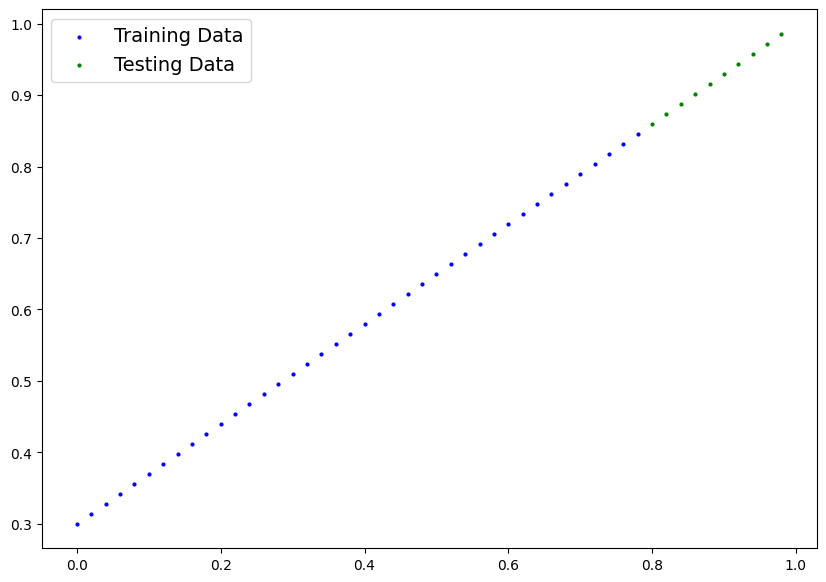

In [11]:
plot_predictions() # Since we hardcoded the inputs we can just run as is without input params

Blue dots are input , green dots are ideal output

Red dots would be the predictions. Since we dont have any predictions yet, the red dots are missing.

An ideal (perfect) model would have the red dots exactly over the green dots.



## 2. Build model

Our first PyTorch model!

Linear Regression Info - https://en.wikipedia.org/wiki/Linear_regression

Classes in Python - https://realpython.com/python3-object-oriented-programming/

In [12]:
# Create a linear regression model class
